In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.15


## Iris

In [2]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [3]:
len(data.targets),len(data_train.targets),len(data_test.targets),

(150, 120, 30)

In [4]:
C=Perceptron()

In [7]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.0019290447235107422 seconds ')


In [8]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 68.333333333333329)
('On Test Set:', 63.333333333333329)


In [9]:
C.coef_  # these are the weights

array([[ -9.2,  -3.3,   2.2,   6.3],
       [ 16.8, -52.3,   2.4, -41.2],
       [ 75.9,  77.5, -45.4, -55.7]])

In [10]:
C=BackProp(hidden_layer_sizes = [4])

In [11]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.01894092559814453 seconds ')


In [12]:
data_train.vectors.shape,data_train.targets.shape

((120, 4), (120,))

In [13]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 98.333333333333329)
('On Test Set:', 96.666666666666671)


In [14]:
W_inp_hid,W_hid_out=C.layers_coef_
print(W_inp_hid)
print("==")
print(W_hid_out)

[[-0.89667654 -1.30269447  5.79713908  0.20073409]
 [-0.00873483 -0.60500481  7.56903499 -0.83223841]
 [-1.42619022 -3.10279071 -1.8664841  -0.59824553]
 [-0.98348621 -1.49753397 -4.33986189 -0.76205018]]
==
[[ -0.49511453  -0.03112743  -0.37435175]
 [ -0.34992786   0.31203243  -0.62306159]
 [-15.16949731   7.15671533   8.66772044]
 [ -0.05447962   0.20554795  -0.74429767]]


## XOR Problem - Perceptron

In [85]:
data=load_csv('data/xor.csv')
print() 
print((data.vectors))
print() 
print((data.targets))

4 vectors of length 2
Feature names: 'p1', 'p2'
Target values given.
Target names: '0', '1'
Mean:  [ 0.5  0.5]
Median:  [ 0.5  0.5]
Stddev:  [ 0.5  0.5]

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [86]:
C=Perceptron()

In [87]:
C.fit(data.vectors,data.targets)

In [90]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))

[0 0 0 0]
('On Training Set:', 50.0)


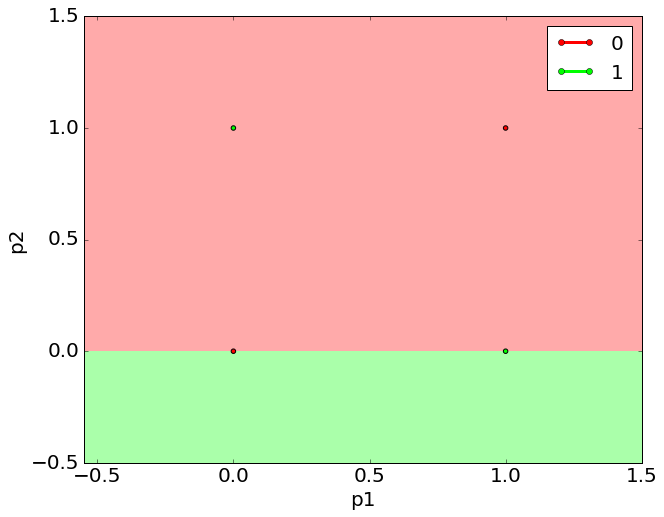

In [89]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [91]:
data.vectors

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  1.]])

In [92]:
data.targets

array([0, 1, 1, 0])

In [105]:
C=BackProp(hidden_layer_sizes = [5])

In [106]:
C.fit(data.vectors,data.targets)

In [107]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))


[0 1 1 0]
('On Training Set:', 100.0)


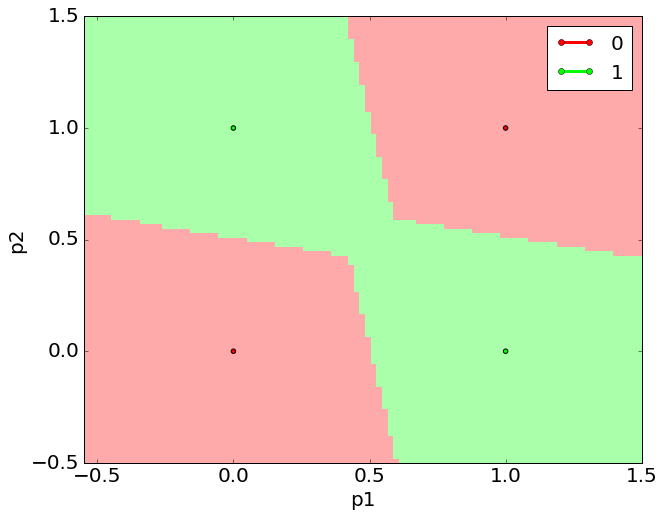

In [108]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [109]:
print((data.vectors))
print()
print((data.targets))

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [110]:
C._decision_scores(data.vectors)

array([[-9.67950051],
       [ 9.88506994],
       [ 9.74490195],
       [-9.72067625]])

In [111]:
h,y=C.output(data.vectors)
print(h)
print() 
print((np.round(h)))
print()
print(y)

[[  0.00000000e+00   1.01449950e-03   0.00000000e+00   0.00000000e+00
    2.92669215e+00]
 [  0.00000000e+00   0.00000000e+00   2.35220401e+00   0.00000000e+00
    3.06199837e-04]
 [  0.00000000e+00   2.35994018e+00   0.00000000e+00   0.00000000e+00
    1.47440274e-04]
 [  2.82729994e+00   2.64244539e-04   2.60820092e-03   0.00000000e+00
    0.00000000e+00]]

[[ 0.  0.  0.  0.  3.]
 [ 0.  0.  2.  0.  0.]
 [ 0.  2.  0.  0.  0.]
 [ 3.  0.  0.  0.  0.]]

[[-9.67950051]
 [ 9.88506994]
 [ 9.74490195]
 [-9.72067625]]


In [112]:
C.layers_coef_

[array([[ 2.82923664, -2.35967593,  2.35298758,  0.02800759, -2.92638595],
        [ 2.827332  ,  2.35892568, -2.34959581, -0.03940826, -2.92654471]]),
 array([[-4.1400625 ],
        [ 3.29271463],
        [ 3.36340295],
        [-0.03570177],
        [-3.98324117]])]

In [113]:
data.vectors.shape

(4, 2)

## Curvy data

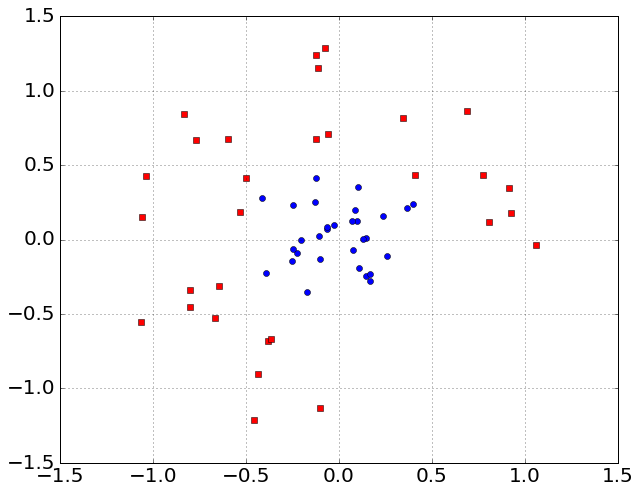

In [78]:
N=30
x1=randn(N)*.2
y1=randn(N)*.2

plot(x1,y1,'bo')

a=linspace(0,3*pi/2,N)
x2=cos(a)+randn(N)*.2
y2=sin(a)+randn(N)*.2

plot(x2,y2,'rs')



In [79]:
vectors=vstack([hstack([atleast_2d(x1).T,atleast_2d(y1).T]),
        hstack([atleast_2d(x2).T,atleast_2d(y2).T]),
        ])
targets=concatenate([zeros(N),ones(N)])
target_names=['center','around']
feature_names=['x','y']

In [80]:
data=Struct(vectors=vectors,targets=targets,
                target_names=target_names,feature_names=feature_names)

('On Training Set:', 53.333333333333336)


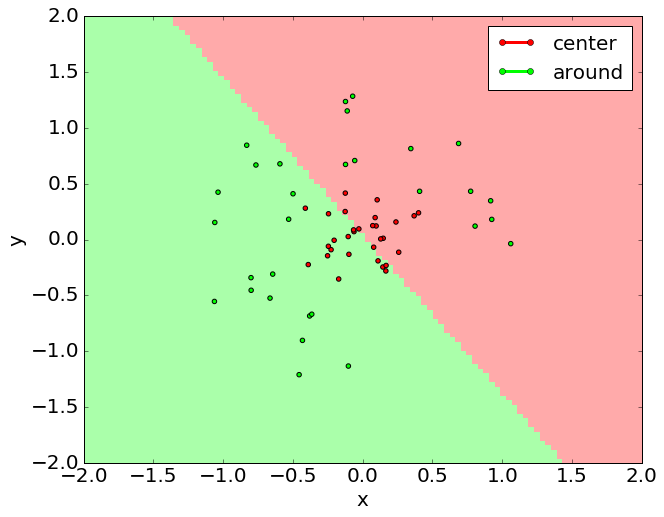

In [81]:
C=Perceptron()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 100.0)


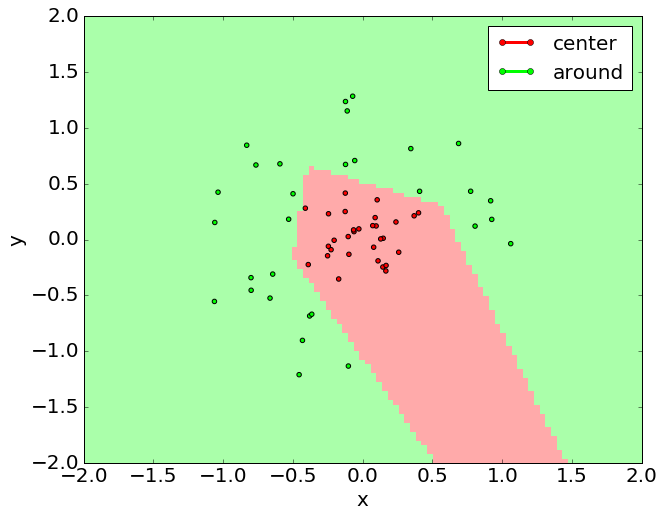

In [82]:
C=BackProp(hidden_layer_sizes = [4])
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 95.0)


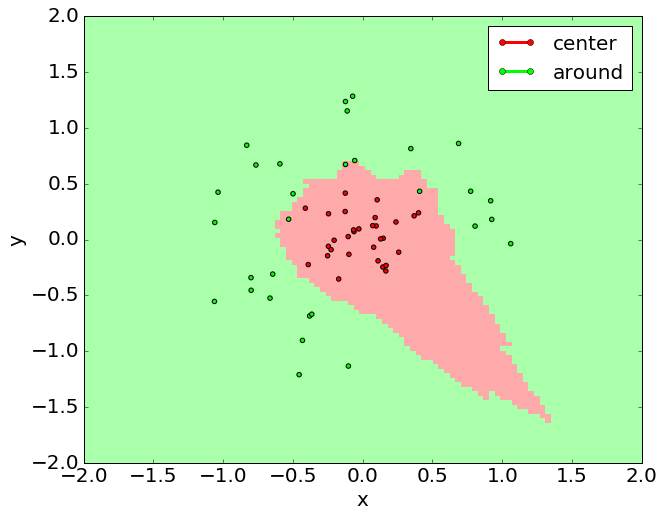

In [83]:
C=kNearestNeighbor()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 100.0)


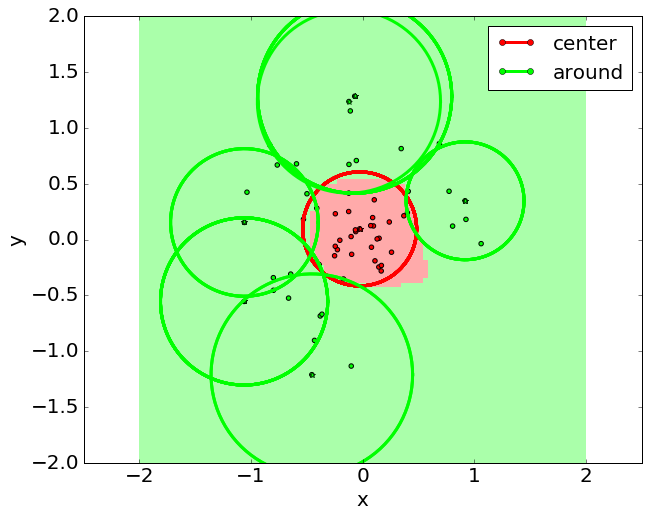

In [84]:
C=CSC()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
C.plot_centers()
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])


## 8x8 - Autoencoder

In [28]:
vectors=eye(8)
targets=arange(1,9)
print((vectors,targets))

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]), array([1, 2, 3, 4, 5, 6, 7, 8]))


In [29]:
C=BackProp(activation='logistic',hidden_layer_sizes = [3],tol=1e-11)
C.fit(vectors,targets)
print((C.predict(vectors)))

[1 2 3 4 5 6 7 8]


In [30]:
h,y=C.output(vectors)

In [31]:
h

array([[ 0.06968896,  0.02535417,  0.0229651 ],
       [ 0.02593471,  0.96824349,  0.97460038],
       [ 0.97161094,  0.97910869,  0.96305342],
       [ 0.97545615,  0.95294663,  0.02152774],
       [ 0.95008996,  0.03529274,  0.98666779],
       [ 0.03315808,  0.97598072,  0.02187985],
       [ 0.97698746,  0.01484107,  0.04018776],
       [ 0.02194995,  0.02938564,  0.97409241]])

In [32]:
h.round()

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [33]:
y.round()

array([[ 11.,  -3., -11.,  -3.,  -3.,   3.,   3.,   3.],
       [ -4.,  11.,   4.,  -4.,  -3.,   4., -12.,   4.],
       [-10.,   3.,  11.,   4.,   4.,  -3.,  -4.,  -5.],
       [ -3.,  -4.,   4.,  11.,  -3.,   4.,   4., -12.],
       [ -3.,  -3.,   4.,  -4.,  10., -11.,   3.,   3.],
       [  4.,   4.,  -3.,   4., -10.,  11.,  -5.,  -4.],
       [  4., -11.,  -4.,   4.,   3.,  -4.,  11.,  -5.],
       [  4.,   4.,  -4., -11.,   4.,  -4.,  -5.,  11.]])

In [34]:
C.predict(vectors)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [35]:
y.shape

(8, 8)

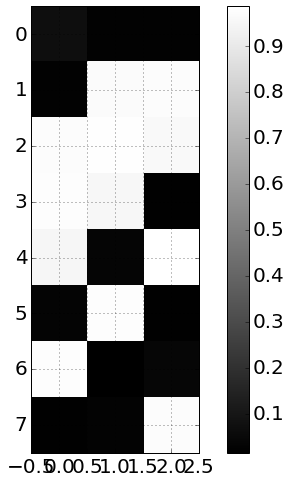

In [36]:
imshow(h,interpolation='nearest',cmap=cm.gray)
colorbar()

In [37]:
weights_xh,weights_hy=C.layers_coef_

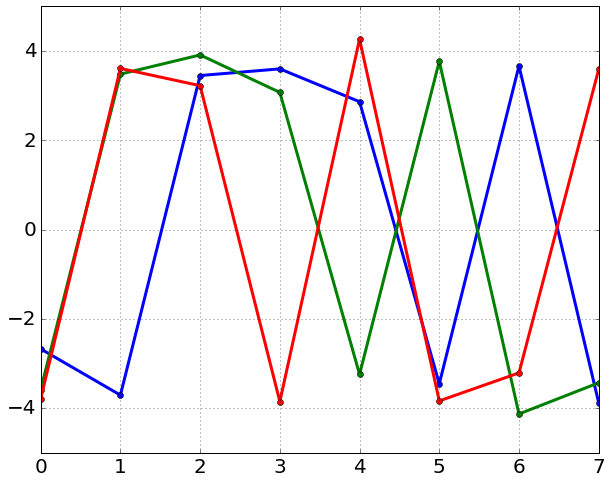

In [38]:
plot(weights_xh,'-o')

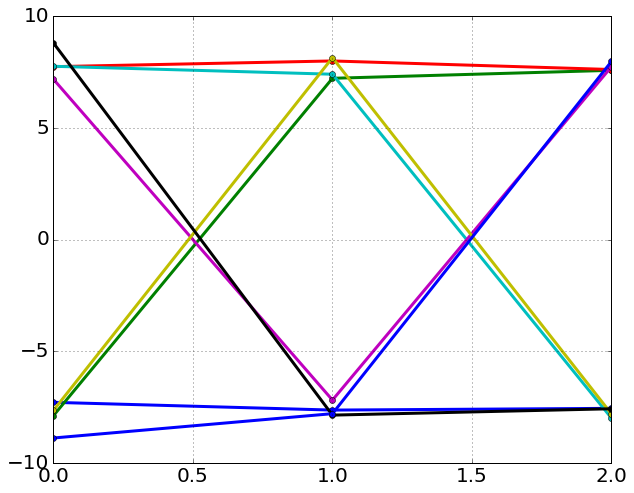

In [39]:
plot(weights_hy,'-o')

## Tuning the number of hidden units

In [40]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.75)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (37, 4)
Test vector shape:  (113, 4)


select which number of hidden units to use

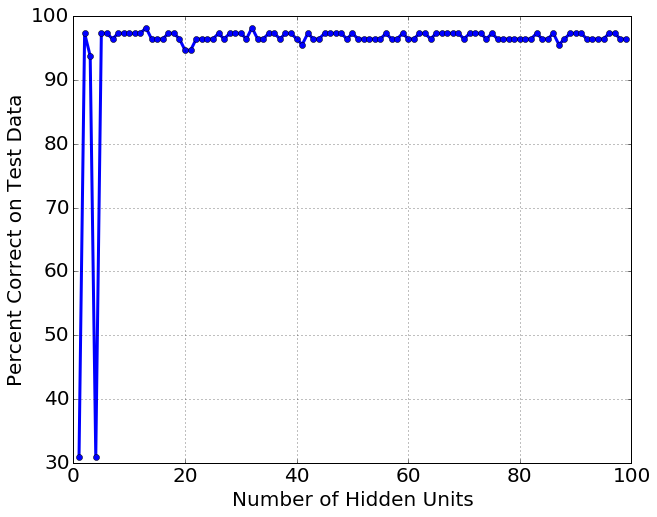

In [41]:
hidden=list(range(1,100))
percent_correct=[]
for n in hidden:
    C=BackProp(hidden_layer_sizes = [n])
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')